In [64]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


df1 = pd.read_csv('googleplaystore.csv') 
df1



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [65]:
data = df1[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating']].groupby(['App']).max().dropna().reset_index()
data["Installs"] = pd.to_numeric(data["Installs"].str.replace(",","").str.replace("+",""))
data["Reviews"] = pd.to_numeric(data["Reviews"])
mydata = data[['App',"Type", 'Size','Category', 'Content Rating', "Rating", "Reviews", "Installs"]]
mydata

C:\Users\andrz\AppData\Local\Temp/ipykernel_21732/2642007296.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Installs"] = pd.to_numeric(data["Installs"].str.replace(",","").str.replace("+",""))


,App,Type,Size,Category,Content Rating,Rating,Reviews,Installs
0,+Download 4 Instagram Twitter,Free,22M,SOCIAL,Everyone,4.5,40467,1000000
1,- Free Comics - Comic Apps,Free,9.1M,COMICS,Mature 17+,3.5,115,10000
2,.R,Free,203k,TOOLS,Everyone,4.5,259,10000
3,/u/app,Free,53M,COMMUNICATION,Mature 17+,4.7,573,10000
4,058.ba,Free,14M,NEWS_AND_MAGAZINES,Everyone,4.4,27,100
...,...,...,...,...,...,...,...,...
8191,감성학원 BL 첫사랑,Free,34M,COMICS,Everyone,4.4,190,10000
8192,💎 I'm rich,Paid,26M,LIFESTYLE,Everyone,3.8,718,10000
8193,"💘 WhatsLov: Smileys of love, stickers and GIF",Free,18M,SOCIAL,Everyone,4.6,22098,1000000
8194,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Free,3.2M,TOOLS,Everyone,4.0,19,10000


In [66]:
size = mydata[:]
size = size[size["Size"] != "Varies with device"]
size["Size number"] = pd.to_numeric(size["Size"].str[:-1])
size["Size units"] = size["Size"].str[-1:]
size["unit bytes"] = size["Size units"].apply(lambda x: 1/1024 if x == "k" else 1)
size["unit bytes"] = pd.to_numeric(size["unit bytes"])
size["Size mb"] = size["Size number"] * size["unit bytes"]
size = size.iloc[:,[0,1,2,3,4,5,6,7,11]]
size.head()

,App,Type,Size,Category,Content Rating,Rating,Reviews,Installs,Size mb
0,+Download 4 Instagram Twitter,Free,22M,SOCIAL,Everyone,4.5,40467,1000000,22.000000
1,- Free Comics - Comic Apps,Free,9.1M,COMICS,Mature 17+,3.5,115,10000,9.100000
2,.R,Free,203k,TOOLS,Everyone,4.5,259,10000,0.198242
3,/u/app,Free,53M,COMMUNICATION,Mature 17+,4.7,573,10000,53.000000
4,058.ba,Free,14M,NEWS_AND_MAGAZINES,Everyone,4.4,27,100,14.000000


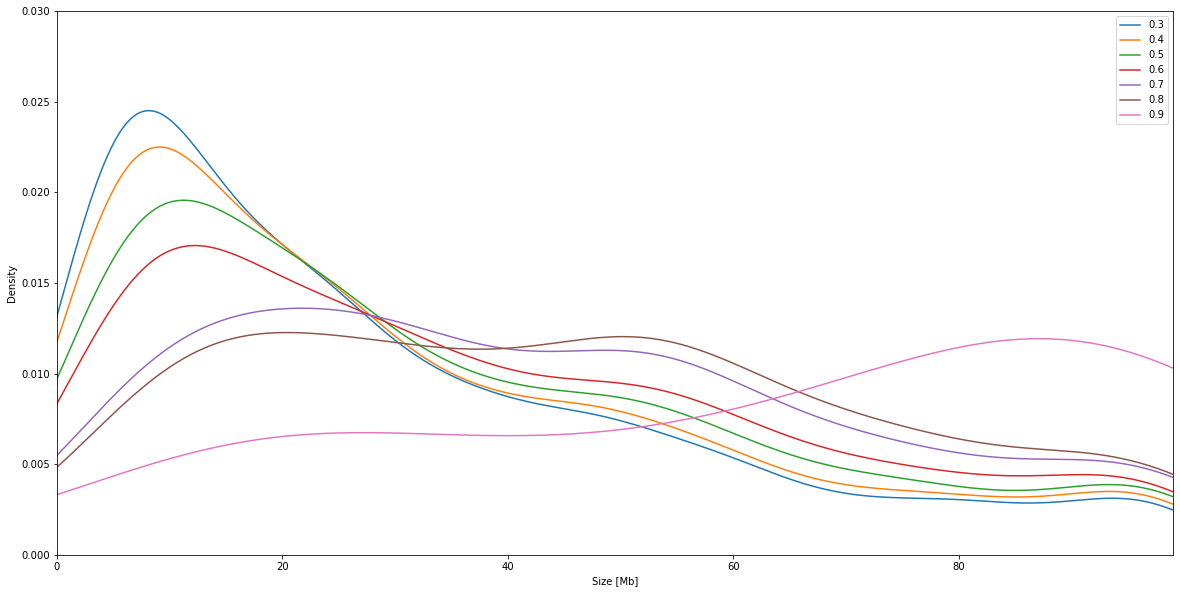

In [117]:
plt.figure(figsize=(20,10))
quantiles = np.arange(0.3, 1, 0.1).round(1)
quantiles.round()
for q in quantiles:
    t = size[size["Installs"] > size["Installs"].quantile(q)]
    t = t[t["Reviews"] > t["Reviews"].quantile(q)]
    t["Size mb"].plot.density(xlim=(0,t["Size mb"].max()), ylim=(0,.03))
    plt.xlabel("Size [Mb]")
    plt.legend(quantiles)
pass

In [67]:
mydata['App'].duplicated().sum()

0

In [68]:
avg_rev =mydata['Reviews'].mean()
avg_inst = mydata['Installs'].mean()
avg_rat = mydata['Rating'].mean()

In [69]:
corr =mydata.corr(method='pearson') ## Get pairwise correlation coefficients
corr

,Rating,Reviews,Installs
Rating,1.000000,0.055035,0.040254
Reviews,0.055035,1.000000,0.623897
Installs,0.040254,0.623897,1.000000


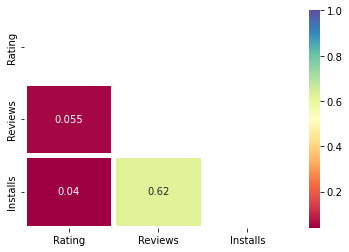

In [70]:
import seaborn as sns
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
hetmap = sns.heatmap(corr, annot=True, cmap = 'Spectral', linewidths=5, mask=mask, vmax=1)

In [71]:
import math
# Independent variables

x = 'Installs'
y = 'Rating'

# Dependent variable
z = 'Reviews'

# Pairings
xz = corr.loc[ x, z ]
yz = corr.loc[ y, z ]
xy = corr.loc[ x, y ]

Rxyz = math.sqrt((abs(xz**2) + abs(yz**2) - 2*xz*yz*xy) / (1-abs(xy**2)) )
R2 = Rxyz**2

# Calculate adjusted R-squared
n = len(mydata) # Number of rows
k = 2       # Number of independent variables
R2_adj = 1 - ( ((1-R2)*(n-1)) / (n-k-1) )

print(R2, R2_adj)

print('Results show that Reviews is almost 38-39% dependent on/correlated with Installs and Rating.')

print('Base on http://www.real-statistics.com/correlation/multiple-correlation/')


0.3901446651402534 0.389995792850528
Results show that Reviews is almost 38-39% dependent on/correlated with Installs and Rating.
Base on http://www.real-statistics.com/correlation/multiple-correlation/


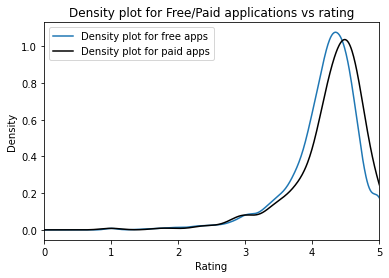

In [72]:
data_type = mydata[['App', 'Type', 'Rating', 'Installs', 'Reviews']]


free_type =data_type[data_type['Type']== 'Free']
paid_type =data_type[data_type['Type']== 'Paid']

import matplotlib.pyplot as plt


free_type['Rating'].plot.density(xlim=(0, free_type['Rating'].max()))
paid_type['Rating'].plot.density(xlim=(0, paid_type['Rating'].max()),color = 'k')
plt.title('Density plot for Free/Paid applications vs rating')
plt.xlabel('Rating')
plt.legend(['Density plot for free apps', 'Density plot for paid apps'])

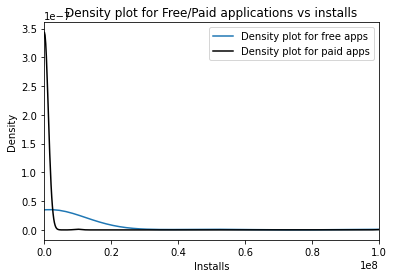

In [73]:
free_type =data_type[data_type['Type']== 'Free']
paid_type =data_type[data_type['Type']== 'Paid']

import matplotlib.pyplot as plt
import seaborn as sns


free_type['Installs'].plot.density(xlim=(0, free_type['Installs'].max()))
paid_type['Installs'].plot.density(xlim=(0, paid_type['Installs'].max()),color = 'k')
plt.title('Density plot for Free/Paid applications vs installs')
plt.xlabel('Installs')
plt.legend(['Density plot for free apps', 'Density plot for paid apps'])

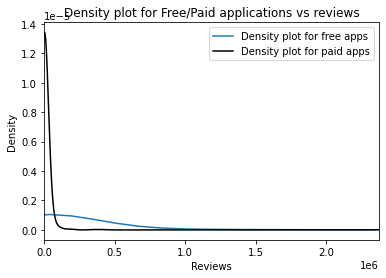

In [74]:
free_type["Reviews"].plot.density(xlim=(0, free_type['Reviews'].max()))
paid_type['Reviews'].plot.density(xlim=(0, paid_type['Reviews'].max()),color = 'k')
plt.title('Density plot for Free/Paid applications vs reviews')
plt.xlabel('Reviews')
plt.legend(['Density plot for free apps', 'Density plot for paid apps'])

<AxesSubplot:ylabel='Density'>

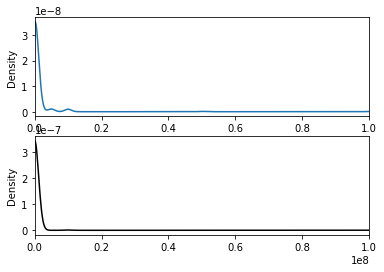

In [75]:
#przebieg dla 'Installs' bez usuwania outlines - na dwóch różnych wykresach

plt.subplot(2,1,1)
free_type['Installs'].plot.density(xlim=(0, free_type['Installs'].max()))
plt.subplot(2,1,2)
paid_type['Installs'].plot.density(xlim=(0, paid_type['Installs'].max()),color = 'k')

In [76]:
roz_mean_i =round(free_type['Installs'].mean() - paid_type['Installs'].mean(), 2)
roz_mean_i

9635767.33

In [77]:
roz_mean_r =round(free_type['Reviews'].mean() - paid_type['Reviews'].mean(), 2)
roz_mean_r

263766.95

In [78]:
stos_mean_i = round(free_type['Installs'].mean()/paid_type['Installs'].mean(), 2)
stos_mean_i

37.96

In [79]:
stos_mean_r = round(free_type['Reviews'].mean()/paid_type['Reviews'].mean(), 2)
stos_mean_r

25.16

In [80]:
avg_free = data_type[data_type['Type']== 'Free']['Rating'].mean()
avg_paid = data_type[data_type['Type']== 'Paid']['Rating'].mean()


print(f'Średnia ocena aplikacji darmowej to : {avg_free}, natomiast płatnej to: {avg_paid}')

Średnia ocena aplikacji darmowej to : 4.166504214963111, natomiast płatnej to: 4.26241721854304


In [81]:
avg_free_r = data_type[data_type['Type']== 'Free']['Reviews'].mean()
avg_paid_r = data_type[data_type['Type']== 'Paid']['Reviews'].mean()


print(f'Średnia liczba recenzji aplikacji darmowej to : {avg_free_r}, natomiast płatnej to: {avg_paid_r}')

Średnia liczba recenzji aplikacji darmowej to : 274686.51896733406, natomiast płatnej to: 10919.566225165563


In [82]:
avg_free_i = data_type[data_type['Type']== 'Free']['Installs'].mean()
avg_paid_i = data_type[data_type['Type']== 'Paid']['Installs'].mean()


print(f'Średnia liczba pobrań aplikacji darmowej to : {avg_free_i}, natomiast płatnej to: {avg_paid_i}')

Średnia liczba pobrań aplikacji darmowej to : 9896446.767123288, natomiast płatnej to: 260679.440397351


In [83]:
#statystyka - bez usuniecia outlines

s1 = data_type.groupby(by='Type').describe()['Rating']
s2 = data_type.groupby(by='Type').describe()['Reviews']
s3 = data_type.groupby(by='Type').describe()['Installs']

In [84]:
s1

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,7592.0,4.166504,0.534214,1.0,4.0,4.3,4.5,5.0
Paid,604.0,4.262417,0.555863,1.0,4.1,4.4,4.6,5.0


In [85]:
s2

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,7592.0,274686.518967,2.061728e+06,1.0,151.75,3863.5,51597.75,78158306.0
Paid,604.0,10919.566225,1.004597e+05,1.0,30.75,209.5,2069.50,2376564.0


In [86]:
s3

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,7592.0,9.896447e+06,6.046887e+07,1.0,10000.0,500000.0,5000000.0,1.000000e+09
Paid,604.0,2.606794e+05,4.109337e+06,1.0,1000.0,5000.0,50000.0,1.000000e+08


<AxesSubplot:>

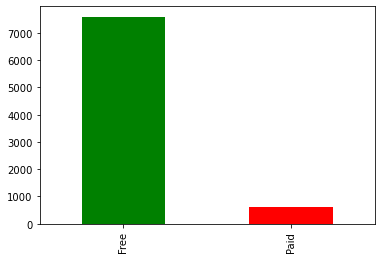

In [87]:
mydata['Type'].value_counts().plot(kind='bar', color=('green', 'red'))

In [88]:
free_type = mydata[mydata['Type']== 'Free']
free_type


,App,Type,Size,Category,Content Rating,Rating,Reviews,Installs
0,+Download 4 Instagram Twitter,Free,22M,SOCIAL,Everyone,4.5,40467,1000000
1,- Free Comics - Comic Apps,Free,9.1M,COMICS,Mature 17+,3.5,115,10000
2,.R,Free,203k,TOOLS,Everyone,4.5,259,10000
3,/u/app,Free,53M,COMMUNICATION,Mature 17+,4.7,573,10000
4,058.ba,Free,14M,NEWS_AND_MAGAZINES,Everyone,4.4,27,100
...,...,...,...,...,...,...,...,...
8190,英漢字典 EC Dictionary,Free,Varies with device,FAMILY,Everyone,4.3,55408,1000000
8191,감성학원 BL 첫사랑,Free,34M,COMICS,Everyone,4.4,190,10000
8193,"💘 WhatsLov: Smileys of love, stickers and GIF",Free,18M,SOCIAL,Everyone,4.6,22098,1000000
8194,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Free,3.2M,TOOLS,Everyone,4.0,19,10000


In [89]:
free_type.dtypes

App                object
Type               object
Size               object
Category           object
Content Rating     object
Rating            float64
Reviews             int64
Installs            int64
dtype: object

TOP 10 kategorii według 'Rating'

In [90]:
cat_rating = free_type[["Category","Rating"]].groupby("Category").describe().reset_index()
cat_rating.columns = cat_rating.columns.droplevel()
cat_rating = cat_rating.sort_values("count", ascending=False)
cat_rating.columns = ["Category", "count", "mean", "std", "min", "25%", "50%", "75%", "max"]
cat_rating.iloc[:10]

,Category,count,mean,std,min,25%,50%,75%,max
11,FAMILY,1492.0,4.171917,0.511395,1.0,3.9,4.3,4.5,5.0
14,GAME,835.0,4.235569,0.384523,1.0,4.1,4.3,4.5,5.0
29,TOOLS,656.0,4.028049,0.617139,1.0,3.8,4.2,4.4,5.0
12,FINANCE,289.0,4.128374,0.647504,1.0,4.0,4.3,4.5,5.0
18,LIFESTYLE,283.0,4.083392,0.712184,1.5,3.8,4.2,4.6,5.0
25,PRODUCTIVITY,283.0,4.181979,0.531017,1.0,4.0,4.3,4.5,5.0
4,BUSINESS,253.0,4.097233,0.661552,1.0,3.8,4.2,4.5,5.0
24,PHOTOGRAPHY,248.0,4.166129,0.482216,2.0,4.0,4.3,4.5,5.0
28,SPORTS,240.0,4.215417,0.472211,1.5,4.0,4.3,4.5,5.0
6,COMMUNICATION,235.0,4.128936,0.444449,1.0,4.0,4.2,4.4,5.0


TOP 10 kategorii według 'Reviews' - sortowane po ilości

In [91]:
cat_reviews = free_type[["Category","Reviews"]].groupby("Category").describe().reset_index()
cat_reviews.columns = cat_reviews.columns.droplevel()
cat_reviews = cat_reviews.sort_values("count", ascending=False)
cat_reviews.columns = ["Category reviews - by count", "count", "mean", "std", "min", "25%", "50%", "75%", "max"]
cat_reviews.iloc[:10]

,Category reviews - by count,count,mean,std,min,25%,50%,75%,max
11,FAMILY,1492.0,1.125237e+05,5.161012e+05,1.0,105.75,1839.5,31623.25,10053186.0
14,GAME,835.0,7.143802e+05,2.609390e+06,1.0,2817.00,43090.0,317554.00,44893888.0
29,TOOLS,656.0,3.494788e+05,2.294336e+06,1.0,79.00,1505.5,37401.50,42916526.0
12,FINANCE,289.0,4.373513e+04,1.496007e+05,1.0,103.00,922.0,20672.00,1374549.0
18,LIFESTYLE,283.0,4.164048e+04,2.060567e+05,1.0,42.50,628.0,9438.00,2789775.0
25,PRODUCTIVITY,283.0,1.958269e+05,5.722077e+05,1.0,171.00,7801.0,80350.00,5383985.0
4,BUSINESS,253.0,3.824740e+04,1.589835e+05,1.0,17.00,183.0,6989.00,1279800.0
24,PHOTOGRAPHY,248.0,4.243431e+05,1.213145e+06,1.0,1763.25,36890.0,246199.75,10859051.0
28,SPORTS,240.0,2.470151e+05,1.188415e+06,1.0,813.00,9201.5,81395.75,14201891.0
6,COMMUNICATION,235.0,1.216716e+06,6.149623e+06,1.0,279.00,22782.0,190822.50,69119316.0


TOP 10 kategorii według 'Reviews' - sortowane po średniej

In [92]:
cat_reviews = free_type[["Category","Reviews"]].groupby("Category").describe().reset_index()
cat_reviews.columns = cat_reviews.columns.droplevel()
cat_reviews = cat_reviews.sort_values("mean", ascending=False)
cat_reviews.columns = ["Category reviews - by mean", "count", "mean", "std", "min", "25%", "50%", "75%", "max"]
cat_reviews.iloc[:10]

,Category reviews - by mean,count,mean,std,min,25%,50%,75%,max
6,COMMUNICATION,235.0,1.216716e+06,6.149623e+06,1.0,279.00,22782.0,190822.50,69119316.0
27,SOCIAL,201.0,1.134009e+06,7.353340e+06,2.0,241.00,10743.0,161610.00,78158306.0
14,GAME,835.0,7.143802e+05,2.609390e+06,1.0,2817.00,43090.0,317554.00,44893888.0
31,VIDEO_PLAYERS,145.0,4.664178e+05,2.364113e+06,3.0,321.00,7335.0,138337.00,25655305.0
24,PHOTOGRAPHY,248.0,4.243431e+05,1.213145e+06,1.0,1763.25,36890.0,246199.75,10859051.0
29,TOOLS,656.0,3.494788e+05,2.294336e+06,1.0,79.00,1505.5,37401.50,42916526.0
26,SHOPPING,178.0,2.503000e+05,8.719636e+05,1.0,1767.75,21831.5,106541.75,6212081.0
28,SPORTS,240.0,2.470151e+05,1.188415e+06,1.0,813.00,9201.5,81395.75,14201891.0
23,PERSONALIZATION,233.0,2.285393e+05,9.399089e+05,2.0,164.00,4724.0,62301.00,7464996.0
25,PRODUCTIVITY,283.0,1.958269e+05,5.722077e+05,1.0,171.00,7801.0,80350.00,5383985.0


TOP 10 kategorii według 'Installs' - sortowane po ilości

In [93]:
cat_installs = free_type[["Category","Installs"]].groupby("Category").describe().reset_index()
cat_installs.columns = cat_installs.columns.droplevel()
cat_installs = cat_installs.sort_values("count", ascending=False)
cat_installs.columns = ["Category installs - by count", "count", "mean", "std", "min", "25%", "50%", "75%", "max"]
cat_installs.iloc[:10]

,Category installs - by count,count,mean,std,min,25%,50%,75%,max
11,FAMILY,1492.0,4.006925e+06,2.820366e+07,10.0,10000.0,100000.0,1000000.0,1.000000e+09
14,GAME,835.0,1.644654e+07,5.455685e+07,5.0,100000.0,1000000.0,10000000.0,1.000000e+09
29,TOOLS,656.0,1.219208e+07,6.102643e+07,10.0,10000.0,100000.0,5000000.0,1.000000e+09
12,FINANCE,289.0,1.574833e+06,6.889417e+06,50.0,10000.0,50000.0,1000000.0,1.000000e+08
18,LIFESTYLE,283.0,1.775837e+06,7.091219e+06,10.0,5000.0,50000.0,1000000.0,1.000000e+08
25,PRODUCTIVITY,283.0,2.044756e+07,8.595287e+07,10.0,10000.0,1000000.0,5000000.0,1.000000e+09
4,BUSINESS,253.0,2.734409e+06,1.132048e+07,5.0,1000.0,10000.0,1000000.0,1.000000e+08
24,PHOTOGRAPHY,248.0,1.877526e+07,6.835187e+07,10.0,100000.0,3000000.0,10000000.0,1.000000e+09
28,SPORTS,240.0,5.396615e+06,1.512259e+07,5.0,50000.0,500000.0,5000000.0,1.000000e+08
6,COMMUNICATION,235.0,4.698673e+07,1.718874e+08,10.0,10000.0,1000000.0,10000000.0,1.000000e+09


TOP 10 kategorii według 'Installs' - sortowane po średniej

In [94]:
cat_installs = free_type[["Category","Installs"]].groupby("Category").describe().reset_index()
cat_installs.columns = cat_installs.columns.droplevel()
cat_installs = cat_installs.sort_values("mean", ascending=False)
cat_installs.columns = ["Category", "count", "mean", "std", "min", "25%", "50%", "75%", "max"]
cat_installs.iloc[:10]

,Category,count,mean,std,min,25%,50%,75%,max
6,COMMUNICATION,235.0,4.698673e+07,1.718874e+08,10.0,10000.0,1000000.0,10000000.0,1.000000e+09
27,SOCIAL,201.0,2.730266e+07,1.312665e+08,5.0,10000.0,500000.0,5000000.0,1.000000e+09
31,VIDEO_PLAYERS,145.0,2.711535e+07,1.244767e+08,100.0,10000.0,1000000.0,10000000.0,1.000000e+09
25,PRODUCTIVITY,283.0,2.044756e+07,8.595287e+07,10.0,10000.0,1000000.0,5000000.0,1.000000e+09
24,PHOTOGRAPHY,248.0,1.877526e+07,6.835187e+07,10.0,100000.0,3000000.0,10000000.0,1.000000e+09
14,GAME,835.0,1.644654e+07,5.455685e+07,5.0,100000.0,1000000.0,10000000.0,1.000000e+09
30,TRAVEL_AND_LOCAL,179.0,1.617138e+07,1.058985e+08,100.0,10000.0,1000000.0,5000000.0,1.000000e+09
29,TOOLS,656.0,1.219208e+07,6.102643e+07,10.0,10000.0,100000.0,5000000.0,1.000000e+09
21,NEWS_AND_MAGAZINES,202.0,1.172824e+07,8.572456e+07,50.0,10000.0,100000.0,1000000.0,1.000000e+09
3,BOOKS_AND_REFERENCE,161.0,1.034639e+07,8.003572e+07,5.0,10000.0,100000.0,1000000.0,1.000000e+09


Histogram 'Reviews'

8196


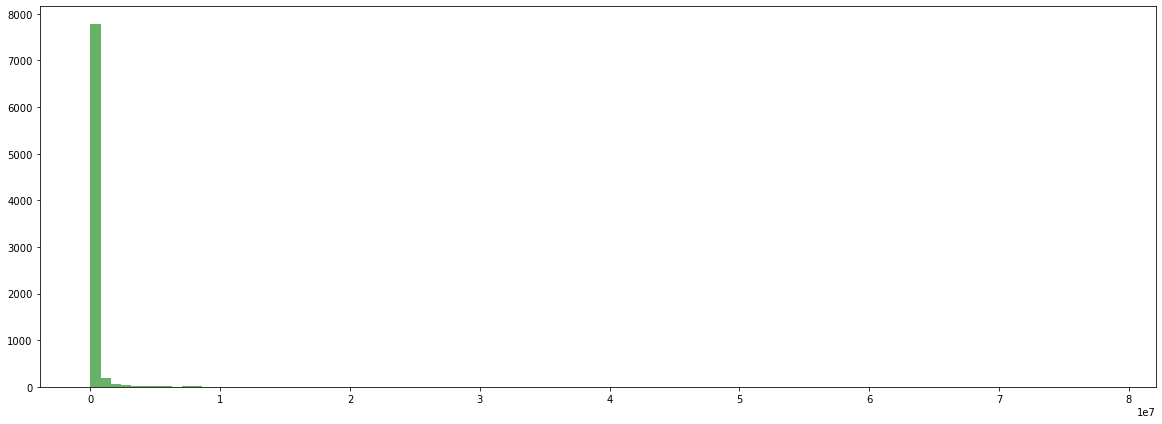

In [95]:
fig = plt.figure(figsize=(20, 7))
plot_data = data["Reviews"]
print(len(plot_data))

plt.hist(plot_data, bins=100, alpha=0.6, color='g')
plt.show()

Histogram 'Reviews' kwantyla 0.8

1639


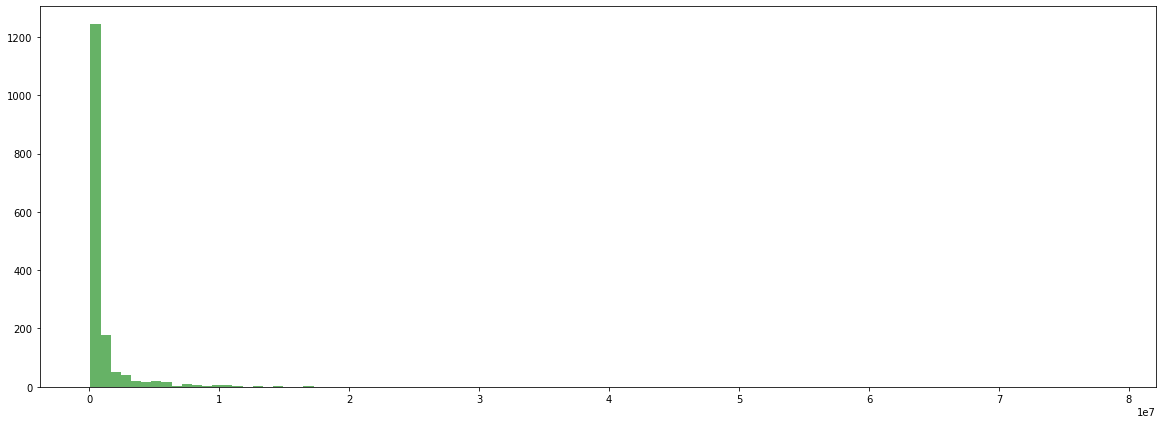

In [96]:
fig = plt.figure(figsize=(20, 7))
plot_data2 = data["Reviews"]
plot_data2 = plot_data2[plot_data2 > plot_data2.quantile(.8)]
print(len(plot_data2))

plt.hist(plot_data2, bins=100, alpha=0.6, color='g')
plt.show()

In [97]:
rev_scores = free_type.sort_values(["Installs","Reviews"], ascending=False)
rev_scores = rev_scores.groupby(["Category"]).count().reset_index()
print("ilość aplikacji", rev_scores["App"].sum())
print("ilość kategorii", rev_scores["Category"].count())
rev_scores["Score"] = round(rev_scores["App"]/min(rev_scores["App"]))
cat_rank =rev_scores.iloc[:,[0,1,-1]].sort_values(["App"], ascending=False)
category_score =cat_rank[['Category', 'Score']]
cat_rank

ilość aplikacji 7592
ilość kategorii 33


,Category,App,Score
11,FAMILY,1492,36.0
14,GAME,835,20.0
29,TOOLS,656,16.0
12,FINANCE,289,7.0
18,LIFESTYLE,283,7.0
25,PRODUCTIVITY,283,7.0
4,BUSINESS,253,6.0
24,PHOTOGRAPHY,248,6.0
28,SPORTS,240,6.0
6,COMMUNICATION,235,6.0


Scoreboard dla 'Category' według 'Installs' i 'Reviews' z kwantylem

In [118]:
q = .8
pop = free_type[free_type["Installs"] > free_type["Installs"].quantile(q)]
pop = pop[pop["Reviews"] > pop["Reviews"].quantile(q)]
pop.sort_values(["Installs","Reviews"], ascending=False)

rev_scores = pop.sort_values(["Installs","Reviews"], ascending=False)
rev_scores = rev_scores.groupby(["Category"]).count().reset_index()
print("ilość aplikacji", rev_scores["App"].sum())
print("ilość kategorii", rev_scores["Category"].count())

rev_scores["Score"] = round(rev_scores["App"]/min(rev_scores["App"]))
rev_scores.iloc[:,[0,1,-1]].sort_values(["App"], ascending=False)

ilość aplikacji 274
ilość kategorii 20


,Category,App,Score
5,GAME,93,93.0
3,FAMILY,31,31.0
1,COMMUNICATION,27,27.0
16,TOOLS,22,22.0
11,PHOTOGRAPHY,20,20.0
14,SOCIAL,13,13.0
12,PRODUCTIVITY,13,13.0
15,SPORTS,9,9.0
10,PERSONALIZATION,8,8.0
13,SHOPPING,8,8.0


In [125]:
content_scores = pop.sort_values(["Installs","Reviews"], ascending=False)
content_scores = content_scores.groupby(["Content Rating"]).count().reset_index()
print("ilość aplikacji", content_scores["App"].sum())
print("ilość kategorii", content_scores["Content Rating"].count())
content_scores.iloc[:,:2].sort_values(["App"], ascending=False)

content_scores["Score_content"] = round(content_scores["App"]/min(content_scores["App"]))
content_scores.iloc[:,[0,1,-1]].sort_values(["App"], ascending=False)

ilość aplikacji 274
ilość kategorii 4


,Content Rating,App,Score_content
0,Everyone,176,13.0
3,Teen,64,5.0
1,Everyone 10+,20,1.0
2,Mature 17+,14,1.0


In [100]:
file  = pd.merge(free_type, category_score, on='Category')
file

,App,Type,Size,Category,Content Rating,Rating,Reviews,Installs,Score
0,+Download 4 Instagram Twitter,Free,22M,SOCIAL,Everyone,4.5,40467,1000000,5.0
1,Alarm.fo – choose your info,Free,3.1M,SOCIAL,Everyone,4.4,19,1000,5.0
2,All Social Networks,Free,1.5M,SOCIAL,Everyone,4.2,22650,1000000,5.0
3,Amino: Communities and Chats,Free,62M,SOCIAL,Teen,4.8,1264084,10000000,5.0
4,Anime et Manga Amino en Français,Free,63M,SOCIAL,Teen,4.8,3782,50000,5.0
...,...,...,...,...,...,...,...,...,...
7587,T-Mobile® FamilyMode™,Free,28M,PARENTING,Everyone,3.1,103,10000,1.0
7588,The first year of a baby's life,Free,9.1M,PARENTING,Everyone,4.8,7505,100000,1.0
7589,Urban Limo Taxi Simulator,Free,53M,PARENTING,Everyone,3.8,824,1000000,1.0
7590,Vegetable Fun,Free,46M,PARENTING,Everyone,3.9,3182,1000000,1.0


In [101]:
file  = pd.merge(file, content_score, on='Content Rating')
file

,App,Type,Size,Category,Content Rating,Rating,Reviews,Installs,Score,Cont_score
0,+Download 4 Instagram Twitter,Free,22M,SOCIAL,Everyone,4.5,40467,1000000,5.0,6105.0
1,Alarm.fo – choose your info,Free,3.1M,SOCIAL,Everyone,4.4,19,1000,5.0,6105.0
2,All Social Networks,Free,1.5M,SOCIAL,Everyone,4.2,22650,1000000,5.0,6105.0
3,Au Pair,Free,15M,SOCIAL,Everyone,3.6,58,10000,5.0,6105.0
4,BG LINKED (BGLINKED),Free,11M,SOCIAL,Everyone,4.7,22,1000,5.0,6105.0
...,...,...,...,...,...,...,...,...,...,...
7587,Events High - Meet Your City!,Free,Varies with device,EVENTS,Everyone 10+,4.2,3200,100000,1.0,274.0
7588,Manga Books,Free,Varies with device,COMICS,Adults only 18+,3.8,7326,500000,1.0,3.0
7589,Manga Master - Best manga & comic reader,Free,4.9M,COMICS,Adults only 18+,4.6,24005,500000,1.0,3.0
7590,DraftKings - Daily Fantasy Sports,Free,41M,SPORTS,Adults only 18+,4.5,50017,1000000,6.0,3.0


In [102]:
d = free_type.sort_values(["Installs","Reviews"], ascending=False)
d = d.groupby(["Rating"]).count().reset_index()
d.iloc[:,:2].sort_values(["App"], ascending=False)

,Rating,App
31,4.3,848
32,4.4,826
33,4.5,782
30,4.2,754
34,4.6,607
29,4.1,591
28,4.0,491
35,4.7,392
27,3.9,343
26,3.8,267


In [103]:
file

,App,Type,Size,Category,Content Rating,Rating,Reviews,Installs,Score,Cont_score
0,+Download 4 Instagram Twitter,Free,22M,SOCIAL,Everyone,4.5,40467,1000000,5.0,6105.0
1,Alarm.fo – choose your info,Free,3.1M,SOCIAL,Everyone,4.4,19,1000,5.0,6105.0
2,All Social Networks,Free,1.5M,SOCIAL,Everyone,4.2,22650,1000000,5.0,6105.0
3,Au Pair,Free,15M,SOCIAL,Everyone,3.6,58,10000,5.0,6105.0
4,BG LINKED (BGLINKED),Free,11M,SOCIAL,Everyone,4.7,22,1000,5.0,6105.0
...,...,...,...,...,...,...,...,...,...,...
7587,Events High - Meet Your City!,Free,Varies with device,EVENTS,Everyone 10+,4.2,3200,100000,1.0,274.0
7588,Manga Books,Free,Varies with device,COMICS,Adults only 18+,3.8,7326,500000,1.0,3.0
7589,Manga Master - Best manga & comic reader,Free,4.9M,COMICS,Adults only 18+,4.6,24005,500000,1.0,3.0
7590,DraftKings - Daily Fantasy Sports,Free,41M,SPORTS,Adults only 18+,4.5,50017,1000000,6.0,3.0


In [104]:
suma = file['Score'] + file['Cont_score'] 
total_2 = pd.Series(suma)
frame_2 = {'Total':total_2}
total_frame_2 = pd.DataFrame(frame_2)
total_frame_2

,Total
0,6110.0
1,6110.0
2,6110.0
3,6110.0
4,6110.0
...,...
7587,275.0
7588,4.0
7589,4.0
7590,9.0


In [105]:
file['Total'] = total_frame_2
file.sort_values(['Total', 'Installs', 'Reviews'], ascending=False).iloc[:30]



,App,Type,Size,Category,Content Rating,Rating,Reviews,Installs,Score,Cont_score,Total
2127,Hay Day,Free,94M,FAMILY,Everyone,4.5,10053186,100000000,36.0,6105.0,6141.0
1965,Duolingo: Learn Languages Free,Free,Varies with device,FAMILY,Everyone,4.7,6297590,100000000,36.0,6105.0,6141.0
1712,Bubble Witch 2 Saga,Free,Varies with device,FAMILY,Everyone,4.3,2838064,100000000,36.0,6105.0,6141.0
2512,Talking Ginger,Free,52M,FAMILY,Everyone,4.2,1752017,100000000,36.0,6105.0,6141.0
2510,Talking Ben the Dog,Free,57M,FAMILY,Everyone,4.3,1633682,100000000,36.0,6105.0,6141.0
2590,Where's My Water? Free,Free,57M,FAMILY,Everyone,4.4,1372013,100000000,36.0,6105.0,6141.0
2514,Talking Tom & Ben News,Free,41M,FAMILY,Everyone,4.4,1131937,100000000,36.0,6105.0,6141.0
2541,Tom Loves Angela,Free,50M,FAMILY,Everyone,4.1,1111915,100000000,36.0,6105.0,6141.0
2545,Township,Free,Varies with device,FAMILY,Everyone,4.6,4451317,50000000,36.0,6105.0,6141.0
2090,Frozen Free Fall,Free,37M,FAMILY,Everyone,4.3,1574546,50000000,36.0,6105.0,6141.0


In [106]:
d = file.sort_values(["Installs","Reviews"], ascending=False)
q = .8
pop = d[d["Total"] > d["Total"].quantile(q)]
# pop = pop[pop["Reviews"] > pop["Reviews"].quantile(q)]
pop.sort_values(["Installs","Reviews"], ascending=False).iloc[:10]

,App,Type,Size,Category,Content Rating,Rating,Reviews,Installs,Score,Cont_score,Total
2127,Hay Day,Free,94M,FAMILY,Everyone,4.5,10053186,100000000,36.0,6105.0,6141.0
1965,Duolingo: Learn Languages Free,Free,Varies with device,FAMILY,Everyone,4.7,6297590,100000000,36.0,6105.0,6141.0
1712,Bubble Witch 2 Saga,Free,Varies with device,FAMILY,Everyone,4.3,2838064,100000000,36.0,6105.0,6141.0
2512,Talking Ginger,Free,52M,FAMILY,Everyone,4.2,1752017,100000000,36.0,6105.0,6141.0
2510,Talking Ben the Dog,Free,57M,FAMILY,Everyone,4.3,1633682,100000000,36.0,6105.0,6141.0
2590,Where's My Water? Free,Free,57M,FAMILY,Everyone,4.4,1372013,100000000,36.0,6105.0,6141.0
2514,Talking Tom & Ben News,Free,41M,FAMILY,Everyone,4.4,1131937,100000000,36.0,6105.0,6141.0
2541,Tom Loves Angela,Free,50M,FAMILY,Everyone,4.1,1111915,100000000,36.0,6105.0,6141.0
2545,Township,Free,Varies with device,FAMILY,Everyone,4.6,4451317,50000000,36.0,6105.0,6141.0
2090,Frozen Free Fall,Free,37M,FAMILY,Everyone,4.3,1574546,50000000,36.0,6105.0,6141.0


In [107]:
dane = df1[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating']].groupby(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating']).mean().reset_index()
dane =dane.dropna()
dane.duplicated().sum()
dane.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
0,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,Everyone
1,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,Mature 17+
2,.R,TOOLS,4.5,259,203k,"10,000+",Free,Everyone
3,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,Mature 17+
4,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100+,Free,Everyone


In [108]:
dane = dane[['App', 'Category', 'Rating', 'Installs', 'Reviews', 'Content Rating', 'Type']]
dane['Installs'] = dane['Installs'].str.rstrip('+')
dane['Installs'] = dane['Installs'].replace(',', '', regex = True)
dane['Installs'] = pd.to_numeric(dane['Installs'])
dane['Reviews'] = pd.to_numeric(dane['Reviews'])

In [109]:
dane.head()
dane[dane['Content Rating'] == 'Unrated']

,App,Category,Rating,Installs,Reviews,Content Rating,Type
2475,DC Universe Online Map,TOOLS,4.1,50000,1186,Unrated,Free


In [110]:
# rozłożenie kategorii po całej tabeli bez korelacji z innymi kolumnami

categorie_test = dane['Category'].unique()

seb_categories = {c:  dane[dane['Category'] == c ]for c in categorie_test}

categorie_test

array(['SOCIAL', 'COMICS', 'TOOLS', 'COMMUNICATION', 'NEWS_AND_MAGAZINES',
       'SPORTS', 'HEALTH_AND_FITNESS', 'FAMILY', 'BOOKS_AND_REFERENCE',
       'LIFESTYLE', 'BUSINESS', 'SHOPPING', 'MEDICAL', 'GAME',
       'PERSONALIZATION', 'PHOTOGRAPHY', 'TRAVEL_AND_LOCAL', 'DATING',
       'PRODUCTIVITY', 'ART_AND_DESIGN', 'FOOD_AND_DRINK',
       'VIDEO_PLAYERS', 'HOUSE_AND_HOME', 'MAPS_AND_NAVIGATION',
       'ENTERTAINMENT', 'FINANCE', 'EDUCATION', 'AUTO_AND_VEHICLES',
       'WEATHER', 'BEAUTY', 'EVENTS', 'LIBRARIES_AND_DEMO', 'PARENTING'],
      dtype=object)

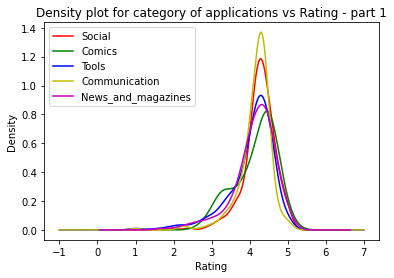

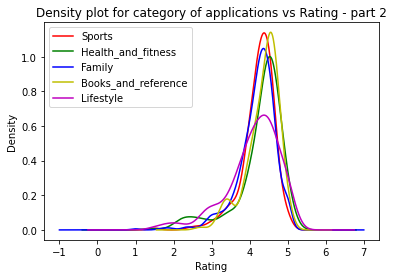

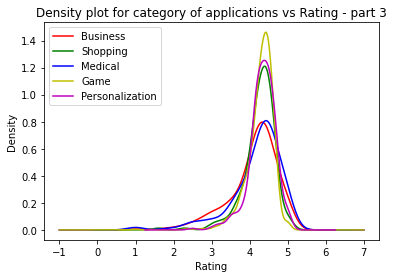

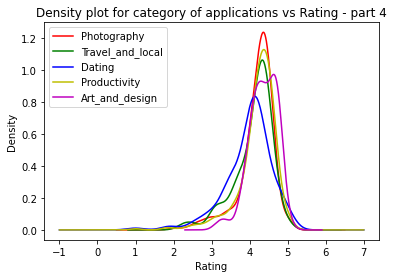

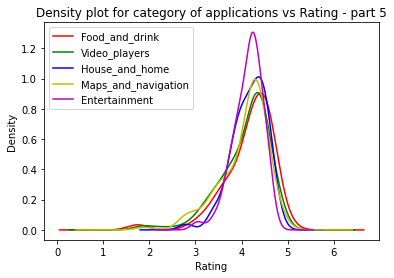

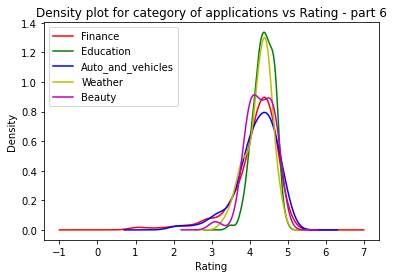

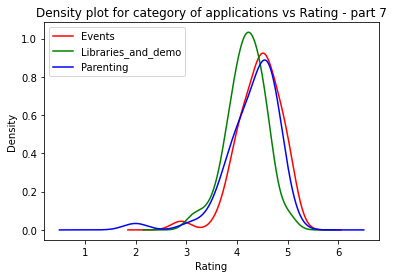

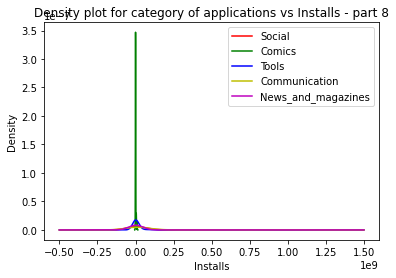

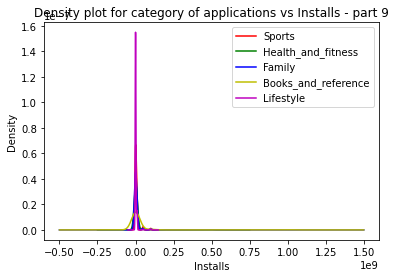

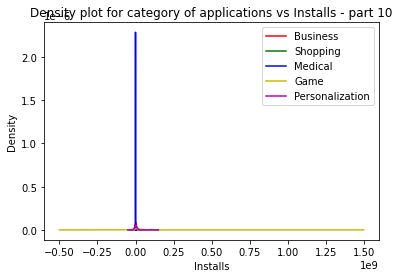

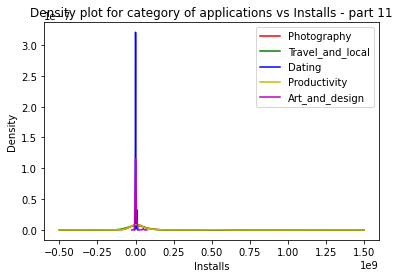

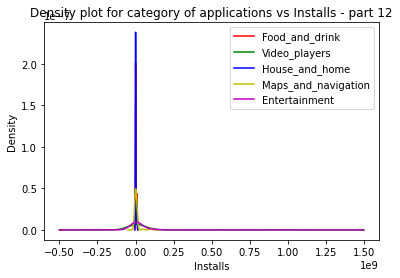

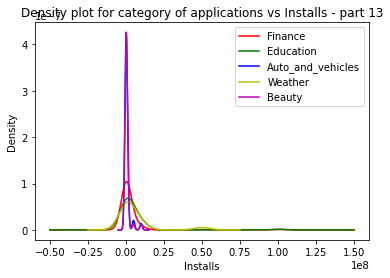

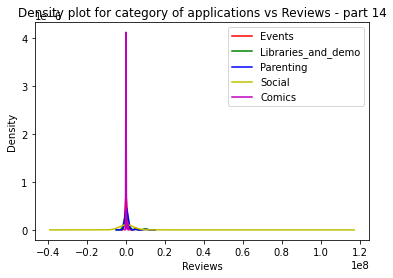

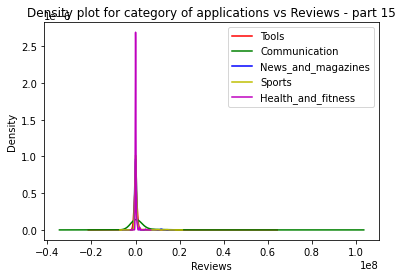

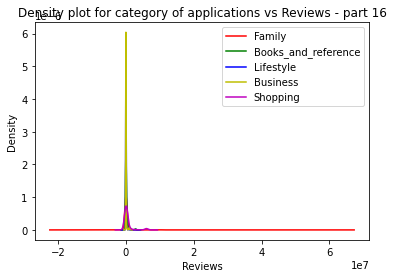

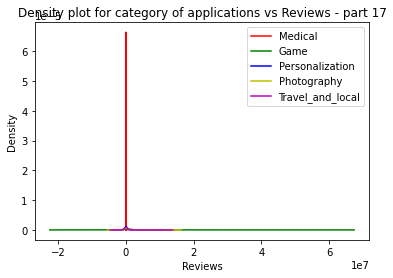

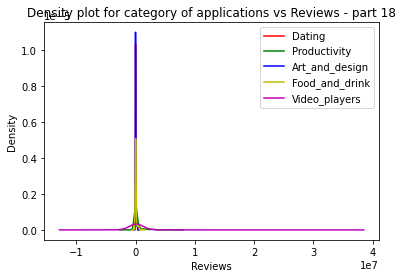

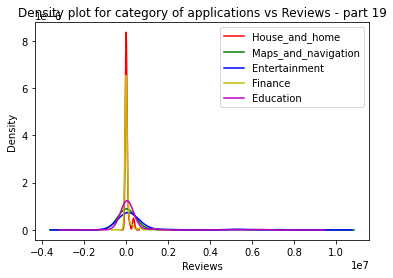

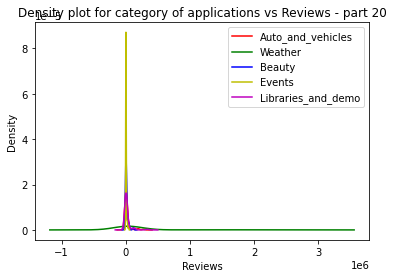

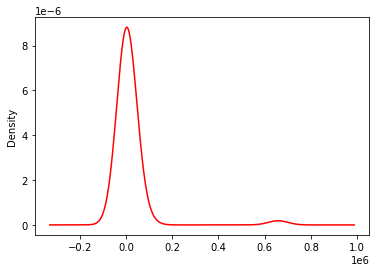

In [111]:
colors = ['r', 'g', 'b', 'y', 'm' ]
n_categories = 0
index = 0
n_plot = 1
for col in ['Rating', 'Installs', 'Reviews']:
    for c in seb_categories.keys():
        seb_categories[c][col].plot.density(label=c.lower().capitalize(), color=colors[n_categories])
        n_categories += 1
        index += 1
        if n_categories == 5 or  index == len(seb_categories.keys()):
            plt.title(f'Density plot for category of applications vs {col} - part {n_plot}')
            plt.xlabel(col)
            plt.legend()
            plt.show()
            n_categories = 0
            n_plot += 1

['Everyone' 'Mature 17+' 'Everyone 10+' 'Teen' 'Unrated' 'Adults only 18+']


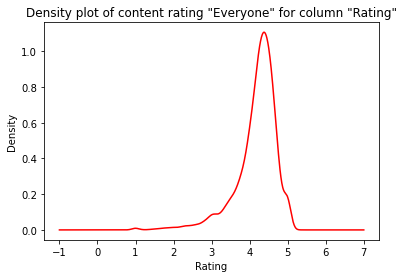

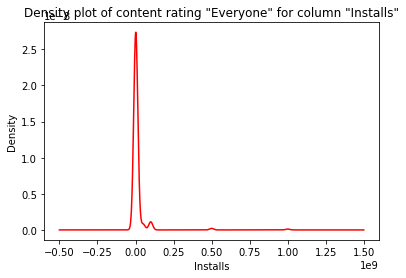

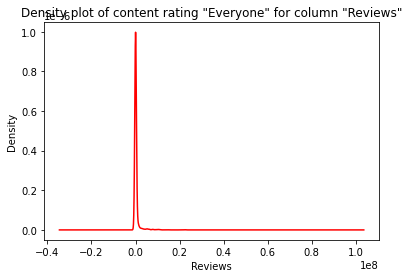

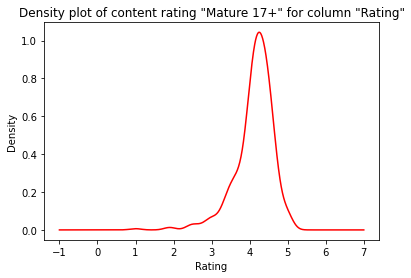

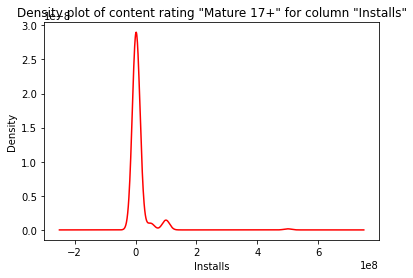

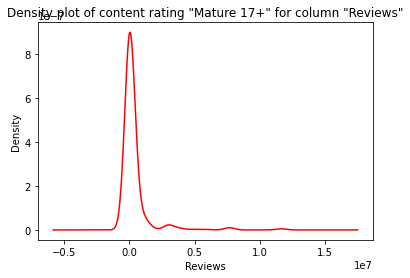

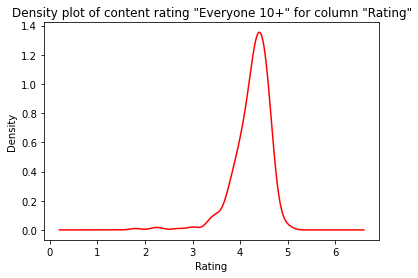

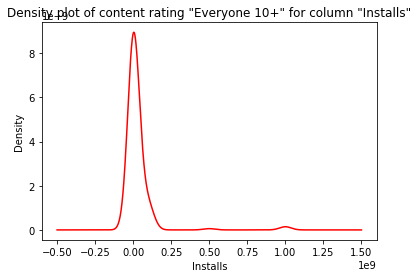

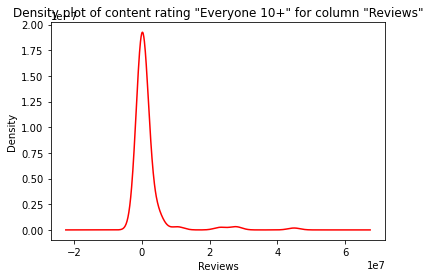

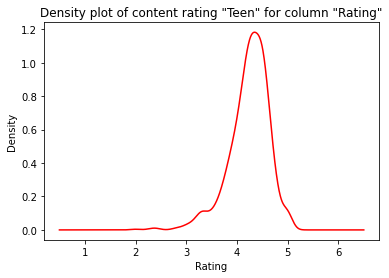

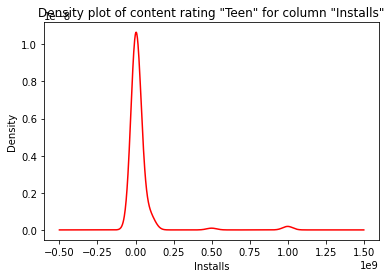

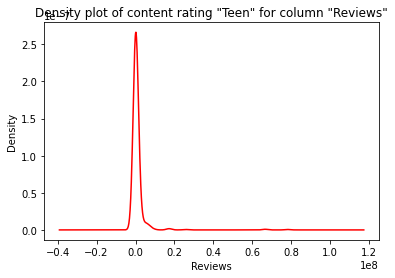

There is no data "Unrated" for column "Rating"


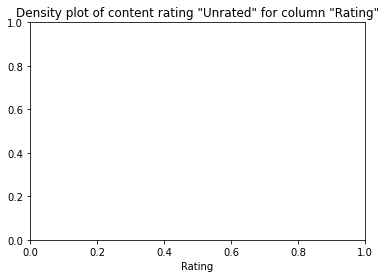

There is no data "Unrated" for column "Installs"


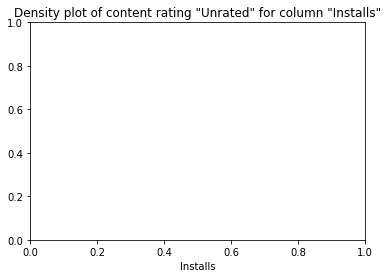

There is no data "Unrated" for column "Reviews"


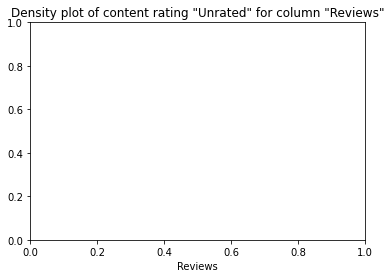

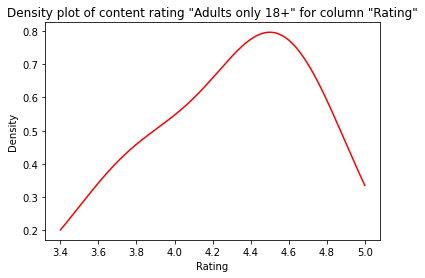

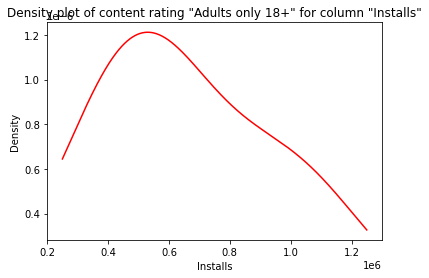

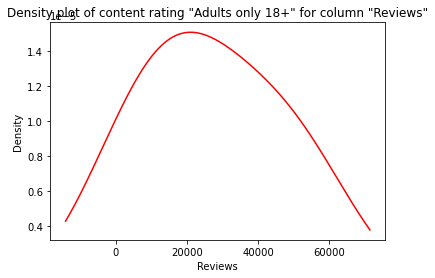

In [112]:
colors = ['r', 'g', 'b', 'y', 'm' ]
print(dane['Content Rating'].unique())
for content_rating in dane['Content Rating'].unique():
    for col in ['Rating', 'Installs', 'Reviews']:
        temp = dane[dane['Content Rating'] == content_rating]
        try:
            temp[col].plot.density(color='r')
        except ValueError:
            print(f'There is no data "{content_rating}" for column "{col}"')
        plt.title(f'Density plot of content rating "{content_rating}" for column "{col}"')
        plt.xlabel(col)
        plt.show()

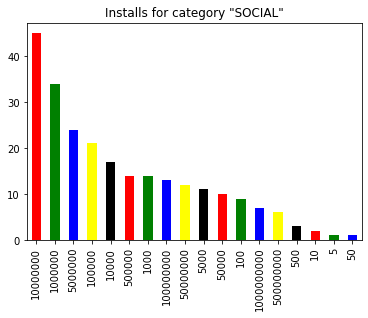

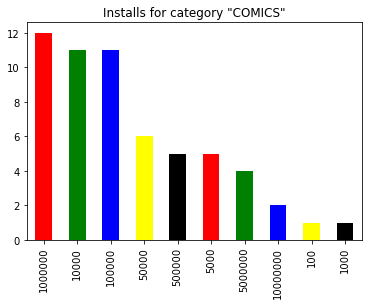

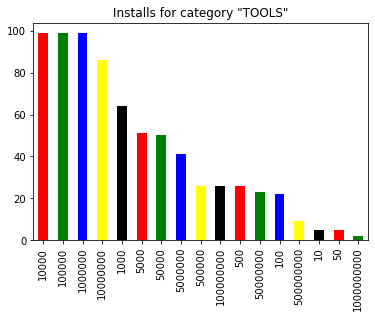

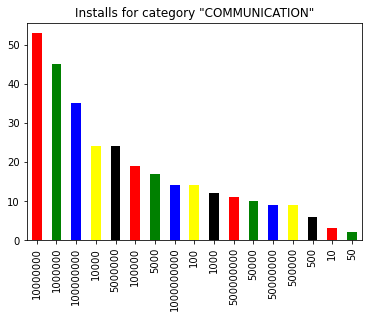

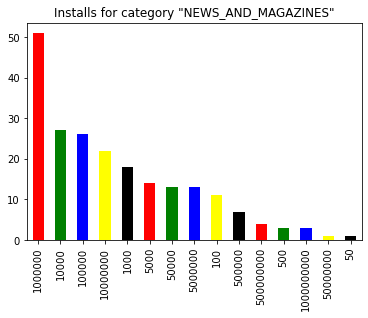

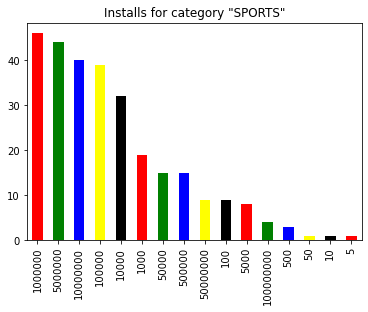

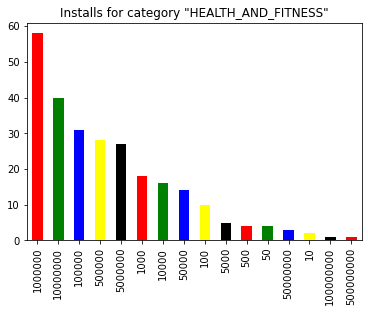

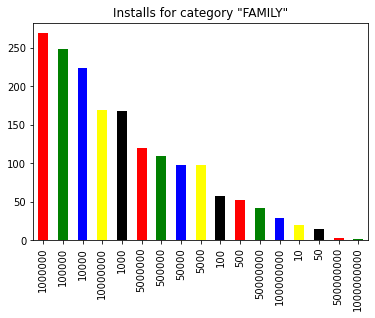

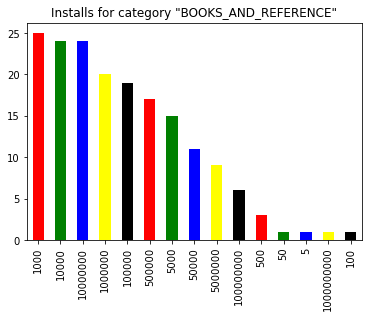

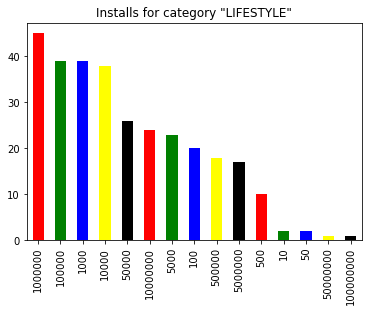

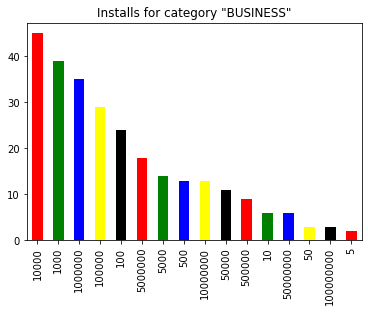

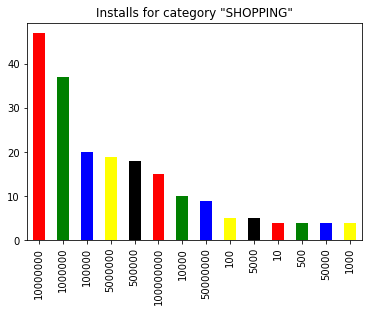

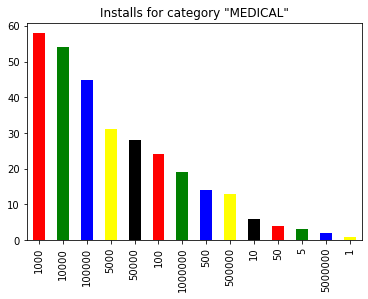

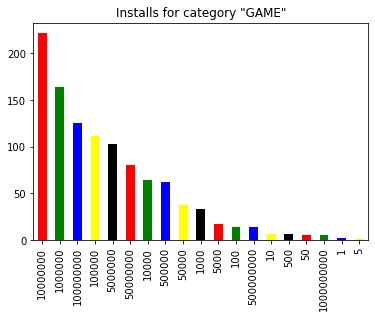

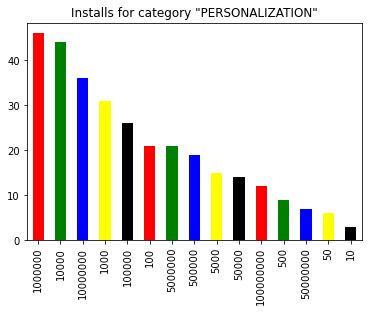

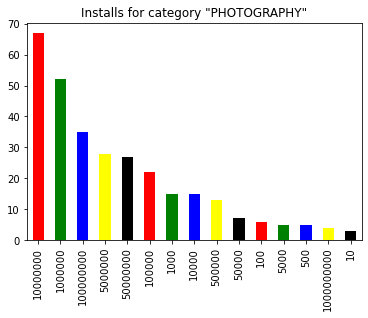

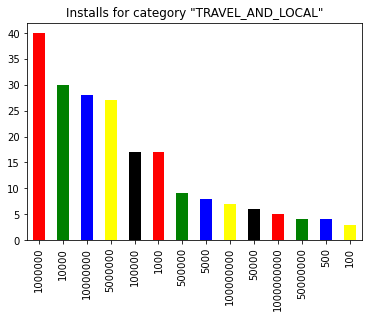

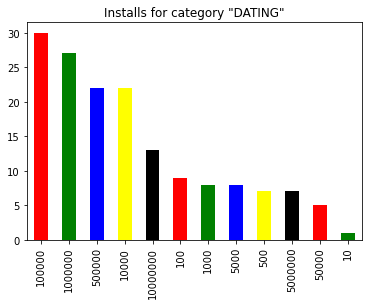

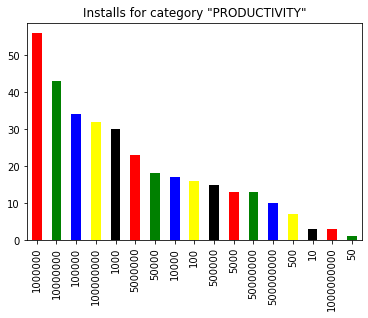

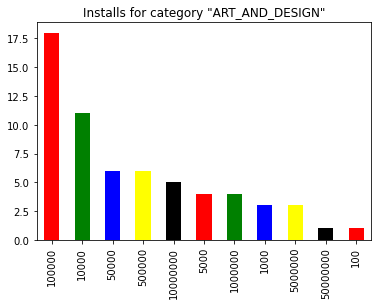

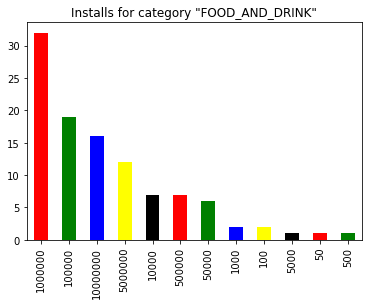

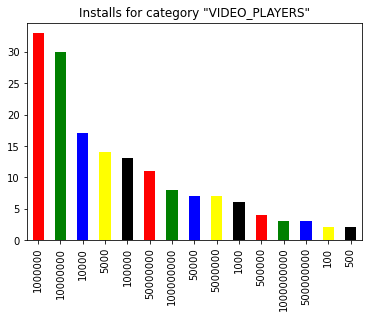

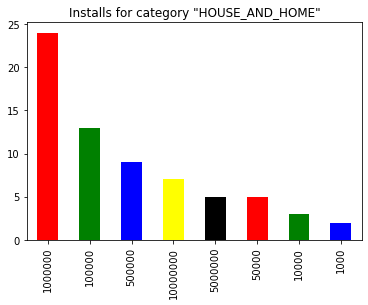

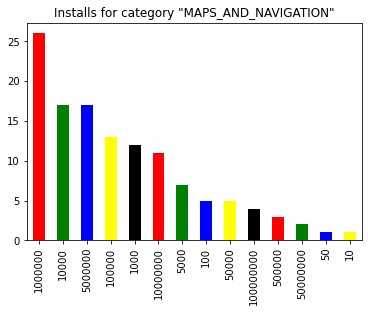

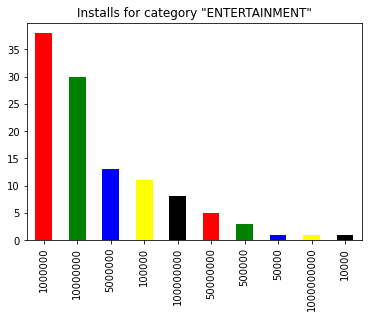

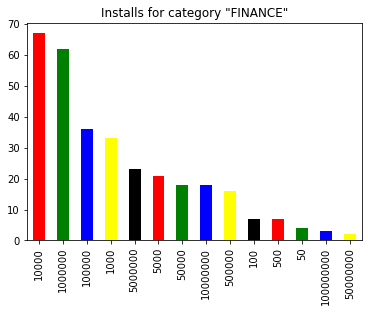

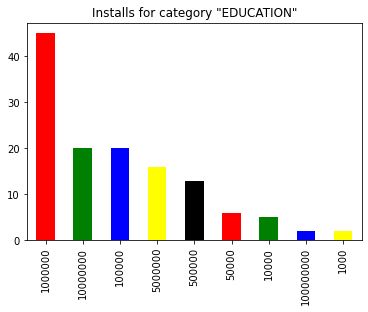

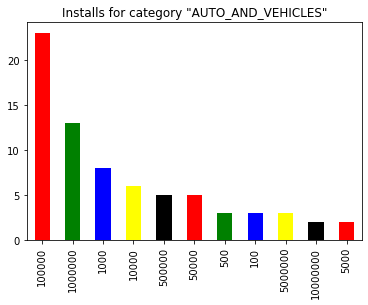

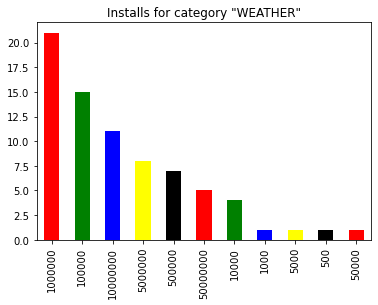

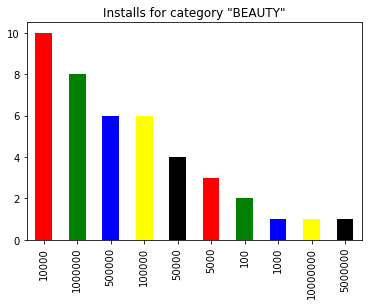

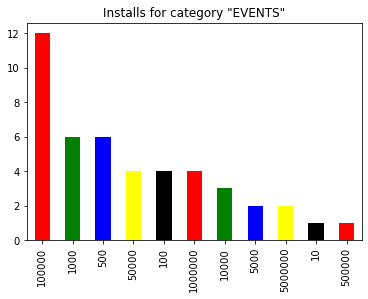

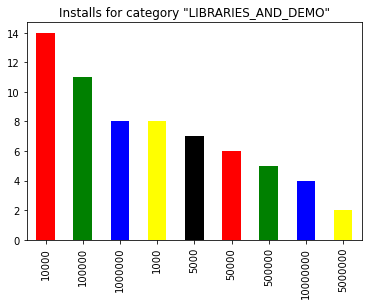

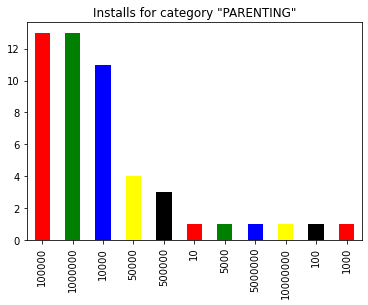

In [113]:
for cat in dane["Category"].unique():
    temp = dane[dane['Category'] == cat]
    temp['Installs'].value_counts().plot(kind='bar', color=('red','green', 'blue', 'yellow', 'black'))
    plt.title(f'Installs for category "{cat}"')
    plt.show()